In [39]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
filmographies = pd.read_csv('filmographies.csv')
nominations = pd.read_csv('nomination_stats.csv')

In [41]:
filmographies.head()

name    name_id                             title   title_id  \
0  Richard Harris  nm0001321  Today Mexico, Tomorrow the World  tt8682736   
1   Ellen Burstyn  nm0000995        The King of Marvin Gardens  tt0068805   
2   Paul Winfield  nm0934902                       Trouble Man  tt0069414   
3   Paul Winfield  nm0934902                           Sounder  tt0069303   
4   Adolph Caesar  nm0128360                            Hammer  tt0068673   

   year   kind position  
0  1972  movie     self  
1  1972  movie  actress  
2  1972  movie    actor  
3  1972  movie    actor  
4  1972  movie    actor

In [42]:
filmographies['year'].describe()

count    76034.000000
mean      2003.159192
std         12.329811
min       1972.000000
25%       1995.000000
50%       2005.000000
75%       2013.000000
max       2022.000000
Name: year, dtype: float64

In [43]:
filmographies['kind'].unique()

array(['movie', 'tv movie', 'tv short', 'video game'], dtype=object)

In [44]:
filmographies['position'].unique()

array(['self', 'actress', 'actor', 'writer', 'soundtrack', 'producer',
       'archive footage', 'stunts', 'director', 'music department',
       'additional crew', 'composer', 'thanks', 'casting director',
       'art department', 'costume designer', 'editor',
       'costume and wardrobe department',
       'script and continuity department',
       'second unit director or assistant director',
       'camera and electrical department', 'casting department',
       'cinematographer', 'sound department', 'editorial department',
       'makeup department', 'transportation department',
       'location management', 'animation department', 'art director'],
      dtype=object)

In [45]:
filmographies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76034 entries, 0 to 76033
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      76034 non-null  object
 1   name_id   76034 non-null  object
 2   title     76034 non-null  object
 3   title_id  76034 non-null  object
 4   year      76034 non-null  int64 
 5   kind      76034 non-null  object
 6   position  76034 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.1+ MB


In [46]:
nominations.head()

name    name_id                           category  year  \
0  Margaret Leighton  nm0500364  Best Actress in a Supporting Role  1972   
1    George C. Scott  nm0001715       Best Actor in a Leading Role  1972   
2        Peter Finch  nm0002075       Best Actor in a Leading Role  1972   
3              Topol  nm0867694       Best Actor in a Leading Role  1972   
4     Walter Matthau  nm0000527       Best Actor in a Leading Role  1972   

   outcome  
0  nominee  
1  nominee  
2  nominee  
3  nominee  
4  nominee

In [47]:
nominations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      1200 non-null   object
 1   name_id   1200 non-null   object
 2   category  1200 non-null   object
 3   year      1200 non-null   int64 
 4   outcome   1200 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB


In [48]:
nominations['category'].unique()

array(['Best Actress in a Supporting Role',
       'Best Actor in a Leading Role', 'Best Actor in a Supporting Role',
       'Best Actress in a Leading Role',
       'Best Performance by an Actress in a Leading Role',
       'Best Performance by an Actor in a Leading Role',
       'Best Performance by an Actress in a Supporting Role',
       'Best Performance by an Actor in a Supporting Role'], dtype=object)

In [50]:
# Kreiranje grafa saradnje glumaca
G = nx.Graph()

In [52]:
# Dodavanje čvorova za sve glumce
actors_df = filmographies[filmographies['position'].isin(['actor', 'actress'])]
actors = actors_df['name'].unique()
print(f"Broj glumaca: {len(actors)}")

G.add_nodes_from(actors)

Broj glumaca: 546


In [54]:
# Dodavanje atributa num_films u čvorove
num_films = actors_df.groupby('name').size()
for node in G.nodes():
    G.nodes[node]['num_films'] = num_films.get(node, 0)

In [55]:
# Dodavanje atributa num_nominations u čvorove
num_nominations = nominations.groupby('name').size().to_dict()
for node in G.nodes():
    G.nodes[node]['num_nominations'] = num_nominations.get(node, 0)

In [56]:
# Dodavanje atributa num_awards u čvorove
winners = nominations[nominations['outcome'] == 'winner']
num_awards = winners.groupby('name').size().to_dict()
for node in G.nodes():
    G.nodes[node]['num_awards'] = num_awards.get(node, 0)

In [57]:
list(G.nodes(data=True))[:10]

[('Ellen Burstyn', {'num_nominations': 6, 'num_films': 104, 'num_awards': 1}),
 ('Paul Winfield', {'num_nominations': 1, 'num_films': 77, 'num_awards': 0}),
 ('Adolph Caesar', {'num_nominations': 1, 'num_films': 14, 'num_awards': 0}),
 ('Robert Downey Jr.',
  {'num_nominations': 2, 'num_films': 85, 'num_awards': 0}),
 ('Maureen Stapleton',
  {'num_nominations': 3, 'num_films': 42, 'num_awards': 1}),
 ('Dustin Hoffman', {'num_nominations': 7, 'num_films': 61, 'num_awards': 2}),
 ('Louis Gossett Jr.',
  {'num_nominations': 2, 'num_films': 132, 'num_awards': 1}),
 ('Joel Grey', {'num_nominations': 2, 'num_films': 30, 'num_awards': 1}),
 ('Bruce Dern', {'num_nominations': 2, 'num_films': 117, 'num_awards': 0}),
 ('Kathleen Quinlan',
  {'num_nominations': 1, 'num_films': 78, 'num_awards': 0})]

In [58]:
# Dodavanje grana između glumaca koji su glumili u istom filmu
for title_id, group in actors_df.groupby('title_id'):
    actor_list = group['name'].tolist()
    for i in range(len(actor_list)):
        for j in range(i+1, len(actor_list)):
            if G.has_edge(actor_list[i], actor_list[j]):
                G[actor_list[i]][actor_list[j]]['weight'] += 1
            else:
                G.add_edge(actor_list[i], actor_list[j], weight=1)

print("Broj čvorova:", G.number_of_nodes())
print("Broj grana:", G.number_of_edges())

Broj čvorova: 546
Broj grana: 19143


In [59]:
# Računanje centralnosti
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

In [17]:
# Broj filmova i nominacija po glumcu
num_films = actors_df.groupby('name').size()
num_nominations = nominations.groupby('name').size()

In [62]:
# Kreiranje DataFrame-a sa svim metrikama
actor_metrics = pd.DataFrame([
    {
        'actor': n,
        'degree': degree_centrality[n],
        'betweenness': betweenness_centrality[n],
        'closeness': closeness_centrality[n],
        'eigenvector': eigenvector_centrality[n],
        'num_films': G.nodes[n].get('num_films', 0),
        'num_nominations': G.nodes[n].get('num_nominations', 0),
        'num_awards': G.nodes[n].get('num_awards', 0)
    }
    for n in G.nodes()
])

print("Metrike glumaca:")
actor_metrics.head()

Metrike glumaca:


actor    degree  betweenness  closeness  eigenvector  \
0      Ellen Burstyn  0.245872     0.006627   0.565353     0.067253   
1      Paul Winfield  0.121101     0.001839   0.521531     0.025591   
2      Adolph Caesar  0.014679     0.000019   0.428459     0.003753   
3  Robert Downey Jr.  0.273394     0.004140   0.573081     0.082264   
4  Maureen Stapleton  0.082569     0.000704   0.506035     0.019666   

   num_films  num_nominations  num_awards  
0        104                6           1  
1         77                1           0  
2         14                1           0  
3         85                2           0  
4         42                3           1

In [63]:
# Korelacija metrika
corr = actor_metrics[['degree','betweenness','closeness','eigenvector','num_films','num_nominations', 'num_awards']].corr()

print("Korelaciona matrica:")
corr

Korelaciona matrica:


degree  betweenness  closeness  eigenvector  num_films  \
degree           1.000000     0.882280   0.906424     0.992068   0.619339   
betweenness      0.882280     1.000000   0.730299     0.849231   0.591381   
closeness        0.906424     0.730299   1.000000     0.894373   0.583969   
eigenvector      0.992068     0.849231   0.894373     1.000000   0.582445   
num_films        0.619339     0.591381   0.583969     0.582445   1.000000   
num_nominations  0.366435     0.357015   0.317476     0.371852   0.057573   
num_awards       0.215562     0.195654   0.189421     0.223611  -0.007277   

                 num_nominations  num_awards  
degree                  0.366435    0.215562  
betweenness             0.357015    0.195654  
closeness               0.317476    0.189421  
eigenvector             0.371852    0.223611  
num_films               0.057573   -0.007277  
num_nominations         1.000000    0.746185  
num_awards              0.746185    1.000000

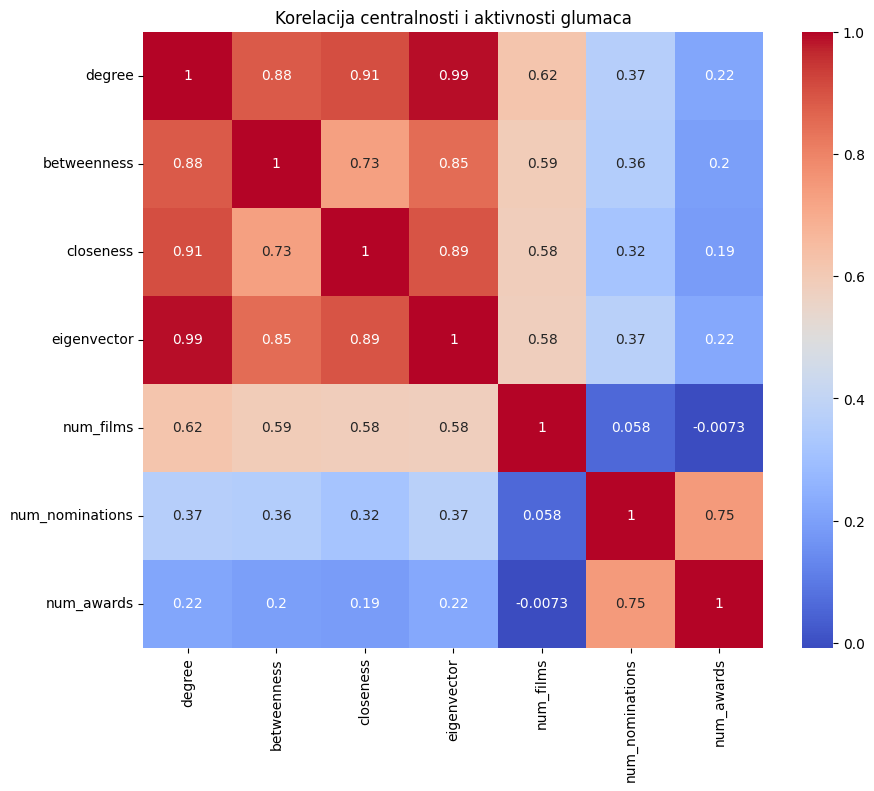

In [64]:
# Vizualizacija korelacije
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelacija centralnosti i aktivnosti glumaca")
plt.show()

In [65]:
# Reachability i shortest paths
reachability = nx.to_pandas_adjacency(G)

print("Reachability matrix (subset):")
reachability.iloc[:10,:10]

Reachability matrix (subset):


Ellen Burstyn  Paul Winfield  Adolph Caesar  \
Ellen Burstyn                0.0            0.0            0.0   
Paul Winfield                0.0            0.0            0.0   
Adolph Caesar                0.0            0.0            0.0   
Robert Downey Jr.            0.0            0.0            0.0   
Maureen Stapleton            0.0            0.0            0.0   
Dustin Hoffman               0.0            0.0            0.0   
Louis Gossett Jr.            1.0            3.0            1.0   
Joel Grey                    0.0            0.0            0.0   
Bruce Dern                   2.0            0.0            0.0   
Kathleen Quinlan             0.0            0.0            0.0   

                   Robert Downey Jr.  Maureen Stapleton  Dustin Hoffman  \
Ellen Burstyn                    0.0                0.0             0.0   
Paul Winfield                    0.0                0.0             0.0   
Adolph Caesar                    0.0                0.0             0.0   
Robert Downey Jr.                0.0                0.0             1.0   
Maureen Stapleton                0.0                0.0             0.0   
Dustin Hoffman                   1.0                0.0             0.0   
Louis Gossett Jr.                0.0                0.0             0.0   
Joel Grey                        0.0                0.0             0.0   
Bruce Dern                       1.0                0.0             0.0   
Kathleen Quinlan                 0.0                1.0             0.0   

                   Louis Gossett Jr.  Joel Grey  Bruce Dern  Kathleen Quinlan  
Ellen Burstyn                    1.0        0.0         2.0               0.0  
Paul Winfield                    3.0        0.0         0.0               0.0  
Adolph Caesar                    1.0        0.0         0.0               0.0  
Robert Downey Jr.                0.0        0.0         1.0               0.0  
Maureen Stapleton                0.0        0.0         0.0               1.0  
Dustin Hoffman                   0.0        0.0         0.0               0.0  
Louis Gossett Jr.                0.0        0.0         3.0               1.0  
Joel Grey                        0.0        0.0         0.0               0.0  
Bruce Dern                       3.0        0.0         0.0               0.0  
Kathleen Quinlan                 1.0        0.0         0.0               0.0

In [66]:
avg_reach = reachability.sum(axis=1)/ (len(G.nodes)-1)
avg_reach_df = pd.DataFrame({'actor': avg_reach.index, 'avg_reach': avg_reach.values})

print("Average reachability per actor:")
print(avg_reach_df.head(10))

Average reachability per actor:
               actor  avg_reach
0      Ellen Burstyn   0.297248
1      Paul Winfield   0.155963
2      Adolph Caesar   0.014679
3  Robert Downey Jr.   0.425688
4  Maureen Stapleton   0.100917
5     Dustin Hoffman   0.293578
6  Louis Gossett Jr.   0.166972
7          Joel Grey   0.091743
8         Bruce Dern   0.247706
9   Kathleen Quinlan   0.117431


In [67]:
# Shortest paths (subset)
shortest_paths = []
subset_actors = list(actors[:10])
for i in subset_actors:
    for j in subset_actors:
        length = nx.shortest_path_length(G, source=i, target=j)
        shortest_paths.append({'source': i, 'target': j, 'length': length})

shortest_paths_df = pd.DataFrame(shortest_paths)

print("Shortest paths (subset):")
shortest_paths_df[:11]

Shortest paths (subset):


source             target  length
0   Ellen Burstyn      Ellen Burstyn       0
1   Ellen Burstyn      Paul Winfield       2
2   Ellen Burstyn      Adolph Caesar       2
3   Ellen Burstyn  Robert Downey Jr.       2
4   Ellen Burstyn  Maureen Stapleton       2
5   Ellen Burstyn     Dustin Hoffman       2
6   Ellen Burstyn  Louis Gossett Jr.       1
7   Ellen Burstyn          Joel Grey       2
8   Ellen Burstyn         Bruce Dern       1
9   Ellen Burstyn   Kathleen Quinlan       2
10  Paul Winfield      Ellen Burstyn       2

In [68]:
# Diameter grafa
largest_cc = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_cc)
diameter = nx.diameter(G_largest)

print("Diameter of the network:", diameter)

Diameter of the network: 4


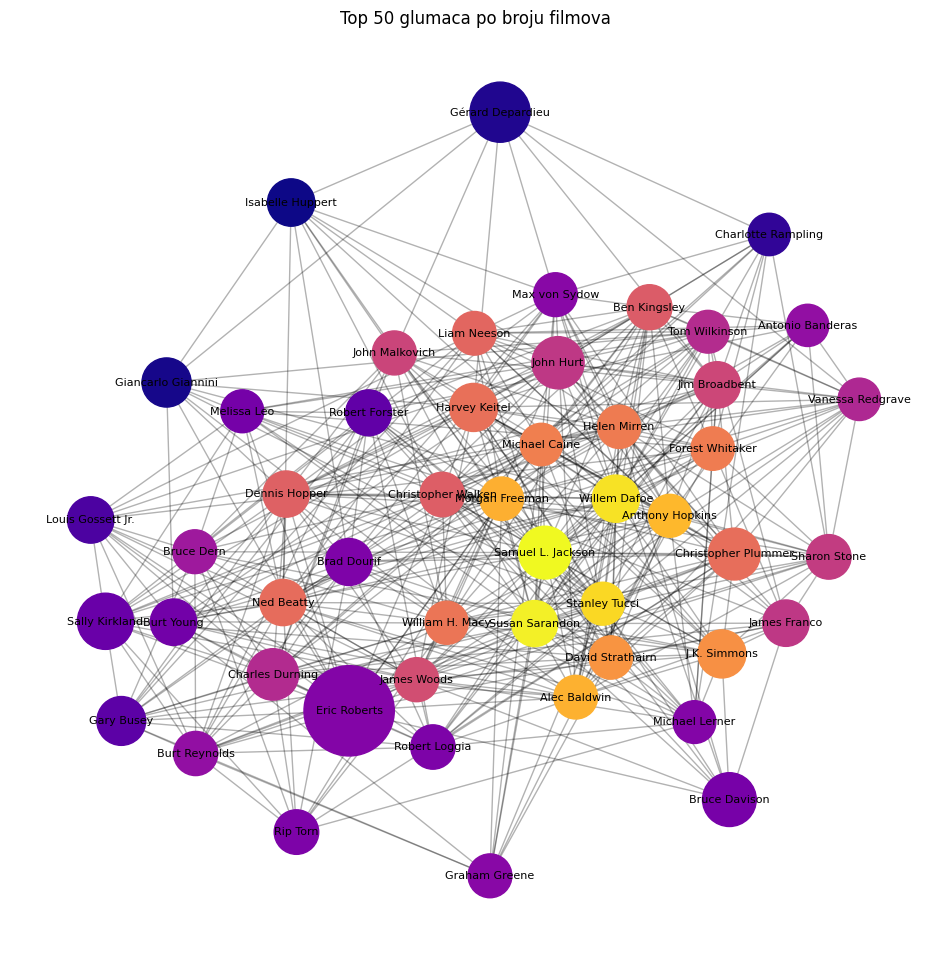

In [73]:
# Podgraf sa top 50 glumaca po broju filmova
top_actors_films = sorted(G.nodes, key=lambda n: G.nodes[n].get('num_films', 0), reverse=True)[:50]
G_top_50_films = G.subgraph(top_actors_films)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G_top_50_films, seed=42, k=0.3)

node_sizes = [60 + 8*G.nodes[a].get('num_films', 0) for a in G_top_50_films.nodes()]
node_colors = [eigenvector_centrality.get(a, 0.1) for a in G_top_50_films.nodes()]

nx.draw_networkx_nodes(G_top_50_films, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma)
nx.draw_networkx_edges(G_top_50_films, pos, alpha=0.3)
nx.draw_networkx_labels(G_top_50_films, pos, font_size=8)
plt.title("Top 50 glumaca po broju filmova")
plt.axis('off')
plt.show()

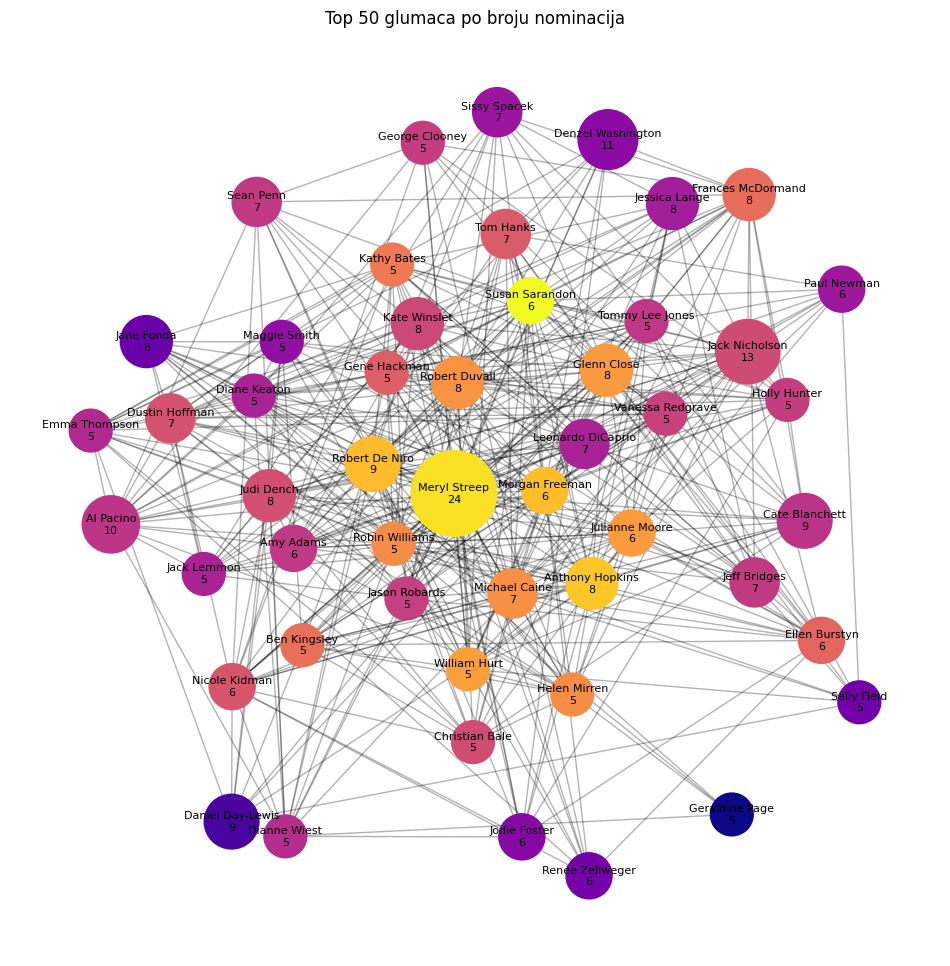

In [89]:
# Podgraf sa top 50 glumaca po broju nominacija
top_actors_nom = sorted(G.nodes, key=lambda n: G.nodes[n].get('num_nominations', 0), reverse=True)[:50]
G_top_50_noms = G.subgraph(top_actors_nom)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G_top_50_noms, seed=42, k=2.0)

node_sizes = [200 + 150*G.nodes[a].get('num_nominations', 0) for a in G_top_50_noms.nodes()]
node_colors = [eigenvector_centrality.get(a, 0.1) for a in G_top_50_noms.nodes()]
labels = {a: f"{a}\n{G.nodes[a]['num_nominations']}" for a in G_top_50_noms.nodes()}

nx.draw_networkx_nodes(G_top_50_noms, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma)
nx.draw_networkx_edges(G_top_50_noms, pos, alpha=0.3)
nx.draw_networkx_labels(G_top_50_noms, pos, labels=labels, font_size=8)
plt.title("Top 50 glumaca po broju nominacija")
plt.axis('off')
plt.show()

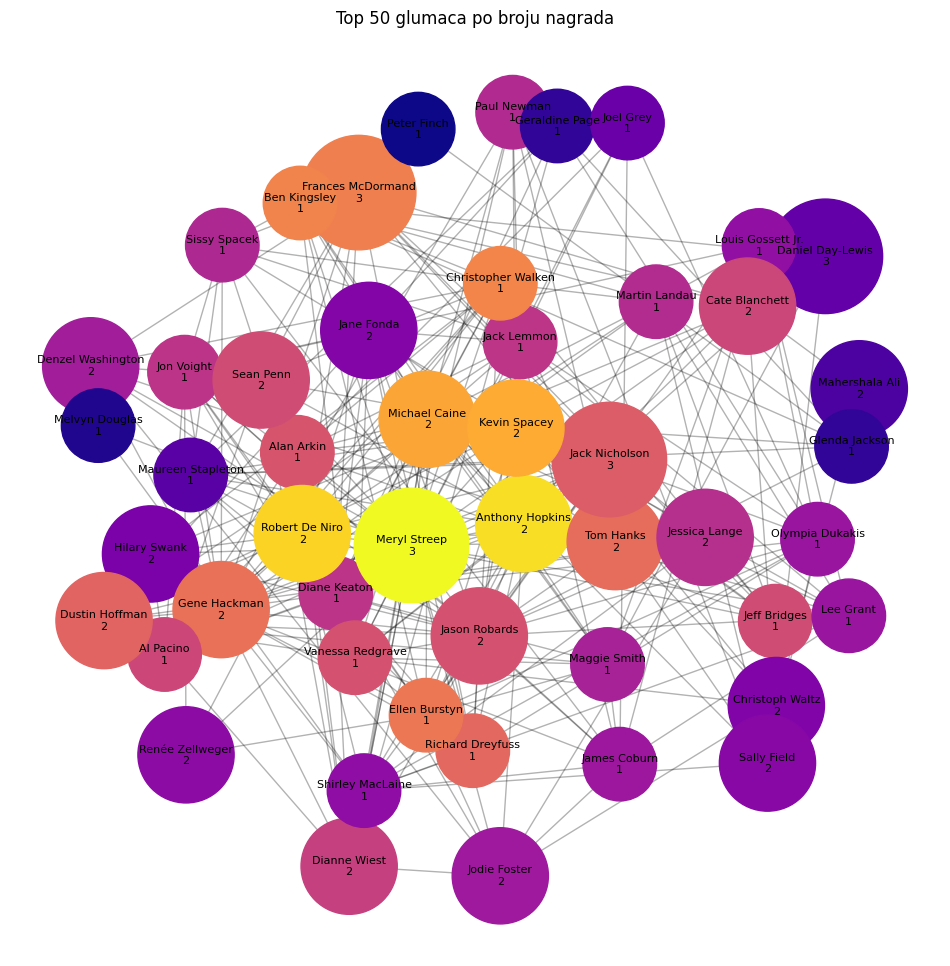

In [112]:
# Podgraf sa top 50 glumaca po broju nagrada
top_actors_awards = sorted(G.nodes, key=lambda n: G.nodes[n].get('num_awards', 0), reverse=True)[:50]
G_top_50_awards = G.subgraph(top_actors_awards)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G_top_50_awards, seed=42, k=2.0)

node_sizes = [800 + 2000*G.nodes[a].get('num_awards', 0) for a in G_top_50_awards.nodes()]
node_colors = [eigenvector_centrality.get(a, 0.1) for a in G_top_50_awards.nodes()]
labels = {a: f"{a}\n{G.nodes[a]['num_awards']}" for a in G_top_50_awards.nodes()}

nx.draw_networkx_nodes(G_top_50_awards, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma)
nx.draw_networkx_edges(G_top_50_awards, pos, alpha=0.3)
nx.draw_networkx_labels(G_top_50_awards, pos, labels=labels, font_size=8)
plt.title("Top 50 glumaca po broju nagrada")
plt.axis('off')
plt.show()

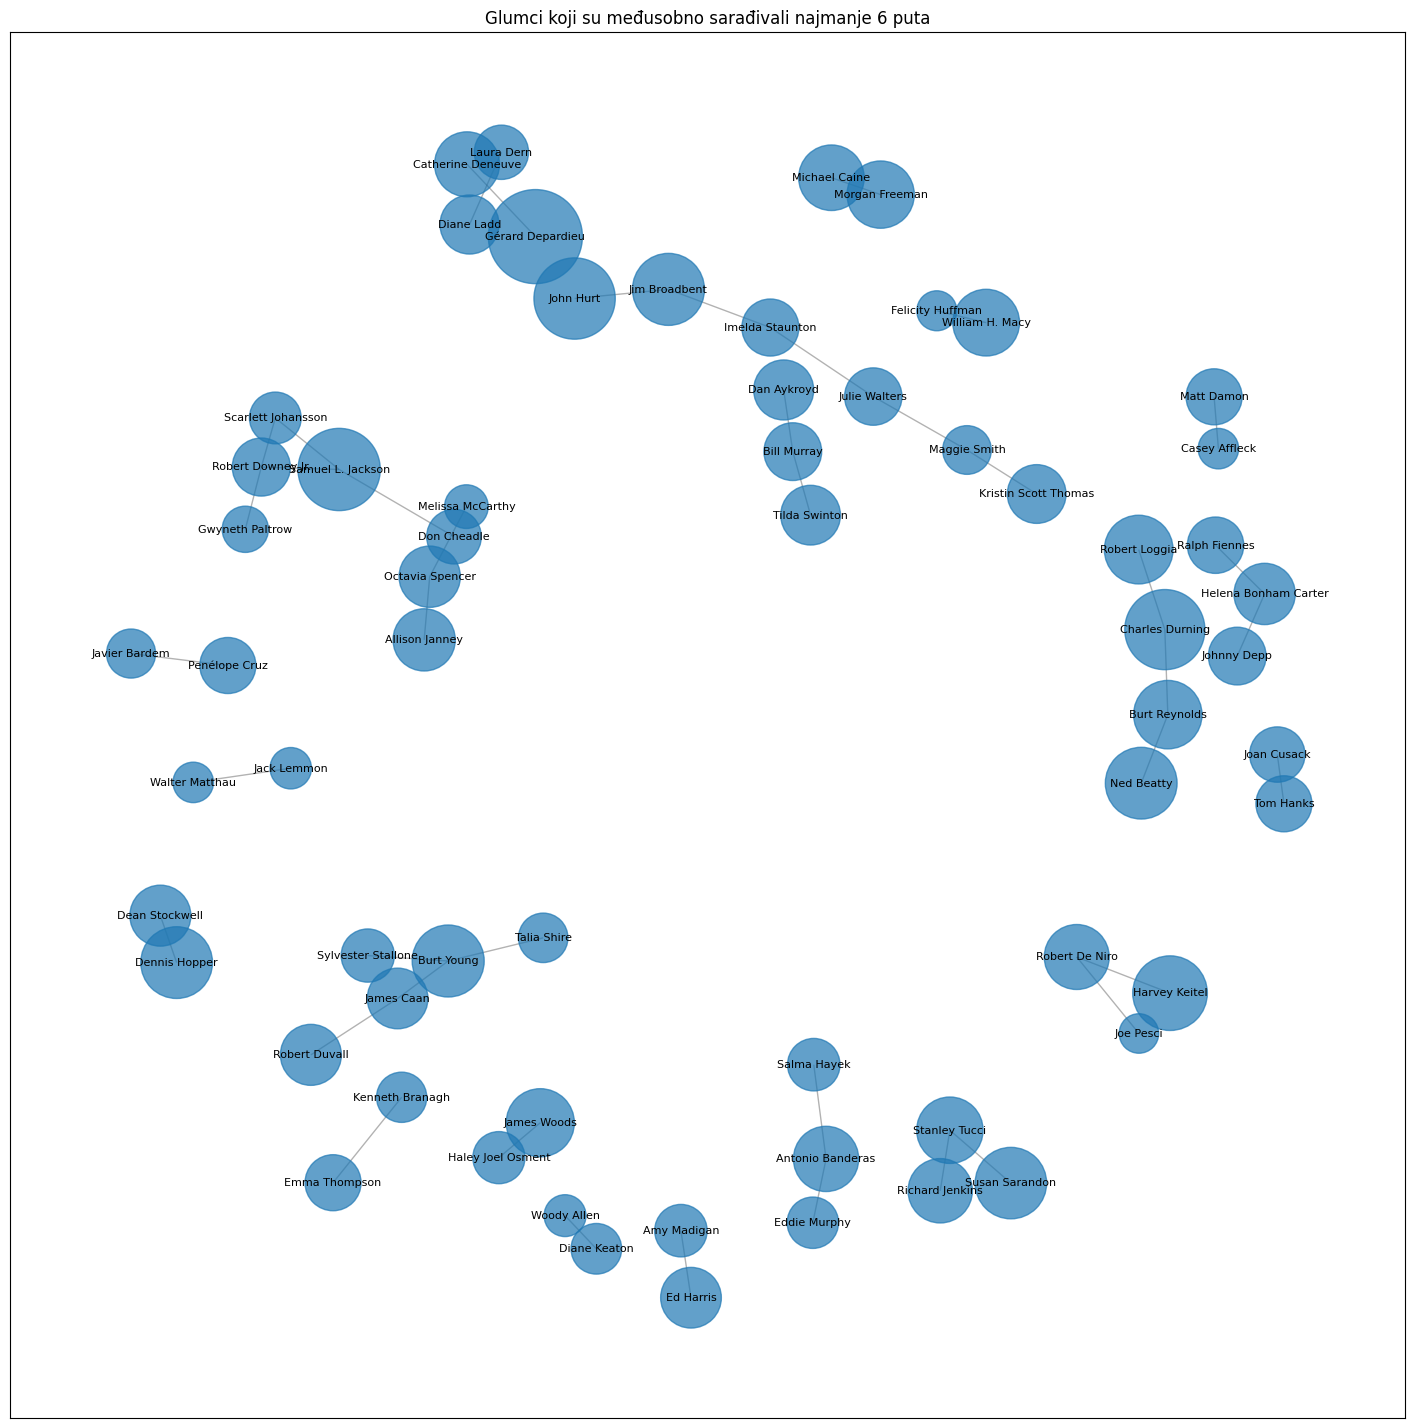

In [156]:
# Glumci koji su međusobno sarađivali najmanje 6 puta
edges_to_keep = [(u,v) for u,v,d in G.edges(data=True) if d['weight'] > 6]
G_filtered = nx.Graph()
G_filtered.add_edges_from(edges_to_keep)

plt.figure(figsize=(18,18))
pos = nx.spring_layout(G_filtered, seed=42, k=0.25)
node_sizes = [50 + 20*G.nodes[a].get('num_films', 0) for a in G_filtered.nodes()]
nx.draw_networkx_nodes(G_filtered, pos, node_size=node_sizes, alpha=0.7)
nx.draw_networkx_edges(G_filtered, pos, alpha=0.3)
nx.draw_networkx_labels(G_filtered, pos, font_size=8)
plt.title("Glumci koji su međusobno sarađivali najmanje 6 puta")
plt.show()

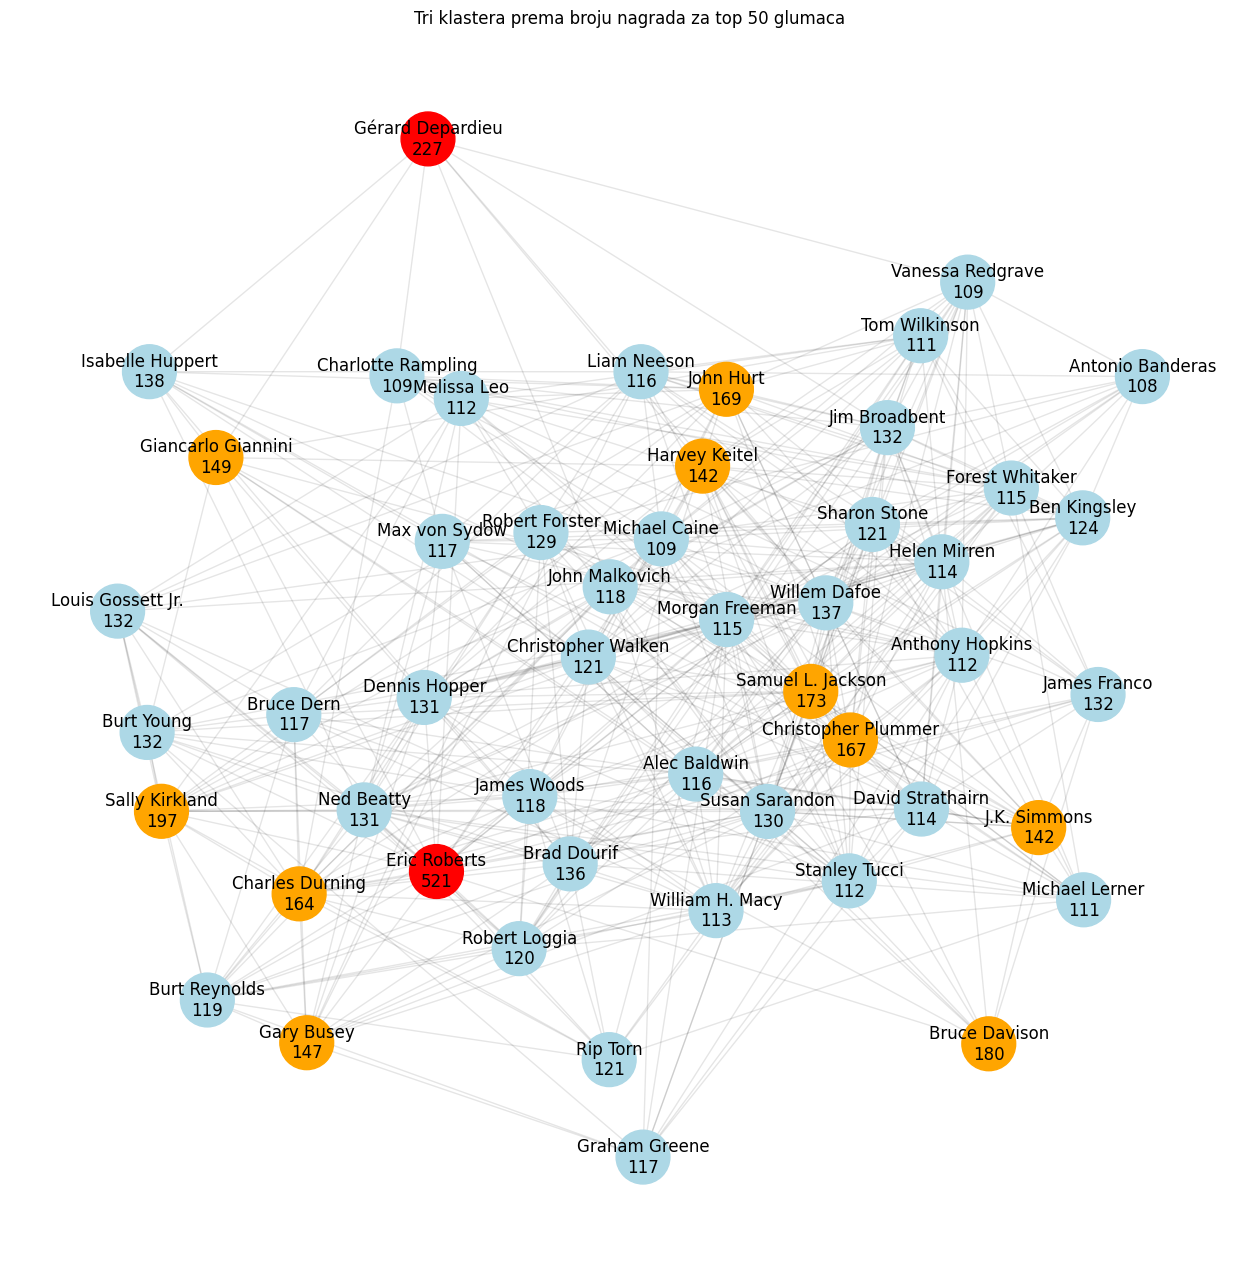

In [154]:
# Klaster po broju filmova - 3 kategorije
def films_cluster(n):
    if n <= 140:
        return 0
    elif n <= 200:
        return 1
    else:
        return 2

color_map_films = ['lightgreen', 'orange', 'pink']
node_colors = [color_map[films_cluster(G_top_50_films.nodes[a].get('num_films',0))] for a in G_top_50_films.nodes()]
pos = nx.spring_layout(G_top_50_films, seed=42, k=1.0)
labels = {a: f"{a}\n{G.nodes[a]['num_films']}" for a in G_top_50_films.nodes()}

plt.figure(figsize=(16,16))
nx.draw_networkx_nodes(G_top, pos, node_size=1500, node_color=node_colors)
nx.draw_networkx_edges(G_top, pos, alpha=0.1)
nx.draw_networkx_labels(G_top, pos, labels=labels, font_size=12)

plt.title("Tri klastera prema broju nagrada za top 50 glumaca")
plt.axis('off')
plt.show()

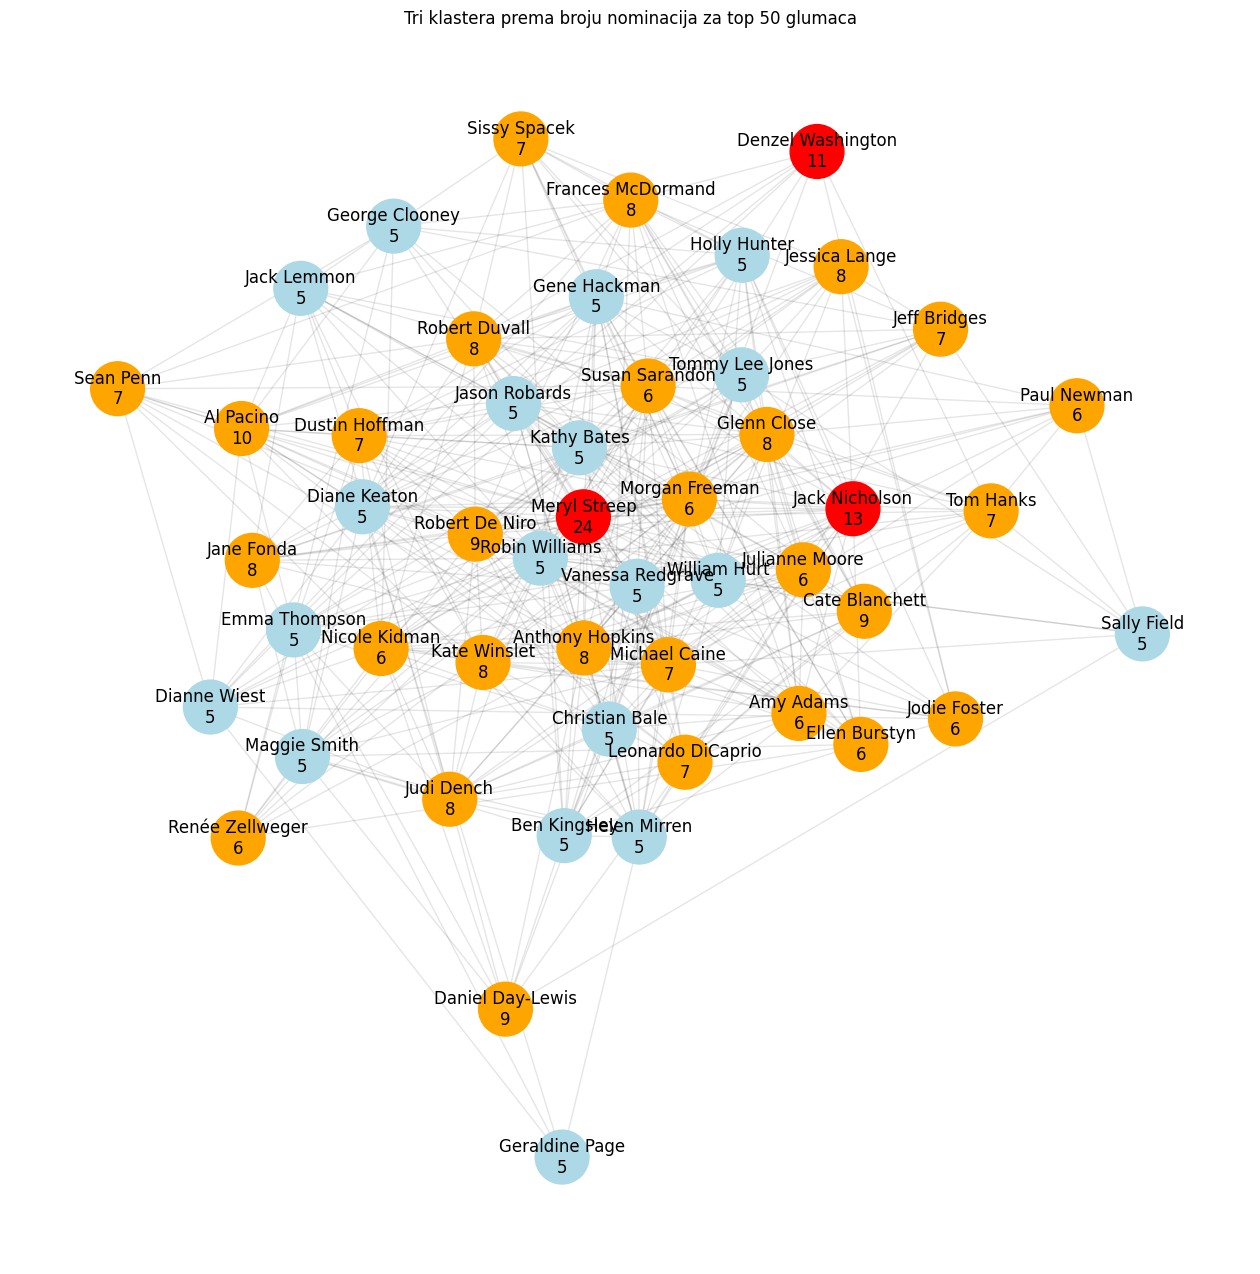

In [146]:
# Klaster po broju nominacija - 3 kategorije
def nomination_cluster(n):
    if n <= 5:
        return 0
    elif n <= 10:
        return 1
    else:
        return 2
 
color_map = ['lightblue', 'orange', 'red']
node_colors = [color_map[nomination_cluster(G_top_50_noms.nodes[a].get('num_nominations',0))] for a in G_top_50_noms.nodes()]
pos = nx.spring_layout(G_top_50_noms, seed=42, k=0.9)
labels = {a: f"{a}\n{G.nodes[a]['num_nominations']}" for a in G_top_50_noms.nodes()}

plt.figure(figsize=(16,16))
nx.draw_networkx_nodes(G_top_50_noms, pos, node_size=1500, node_color=node_colors)
nx.draw_networkx_edges(G_top_50_noms, pos, alpha=0.1)
nx.draw_networkx_labels(G_top_50_noms, pos, labels=labels, font_size=12)

plt.title("Tri klastera prema broju nominacija za top 50 glumaca")
plt.axis('off')
plt.show()

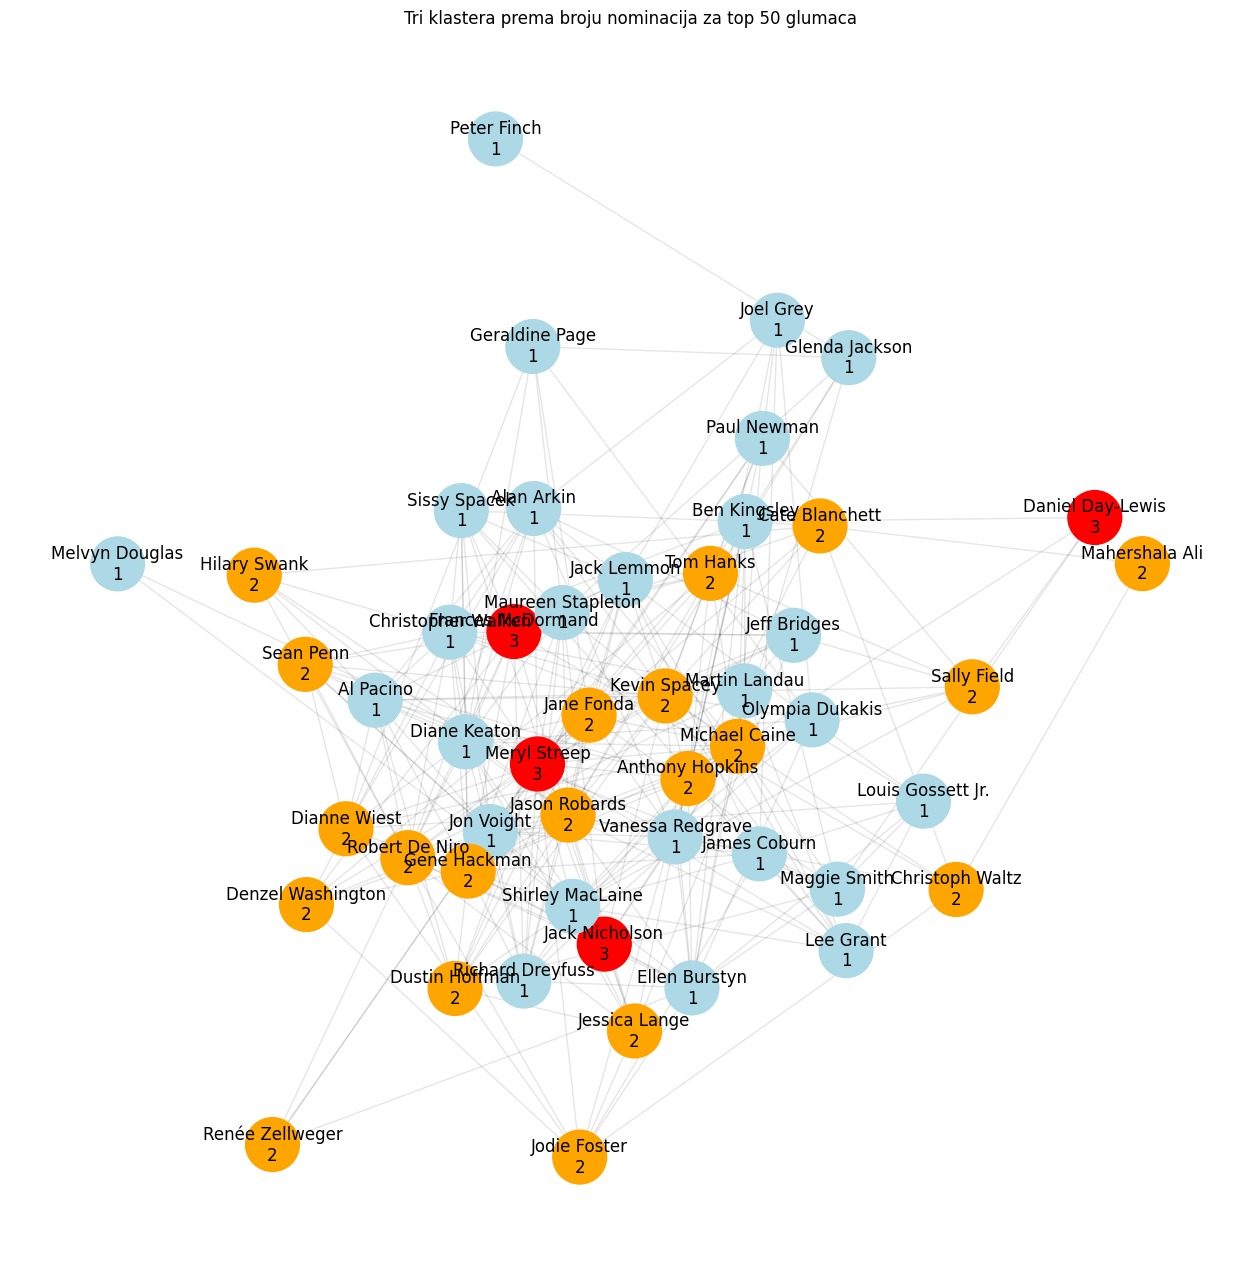

In [155]:
# Klaster po broju osvojenih Oskara - 3 kategorije
def awards_cluster(n):
    if n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return 2
 
color_map_awards = ['lightgray', 'gold', 'red']
node_colors = [color_map[awards_cluster(G_top_50_awards.nodes[a].get('num_awards',0))] for a in G_top_50_awards.nodes()]
pos = nx.spring_layout(G_top_50_awards, seed=42, k=1.0)
labels = {a: f"{a}\n{G.nodes[a]['num_awards']}" for a in G_top_50_awards.nodes()}

plt.figure(figsize=(16,16))
nx.draw_networkx_nodes(G_top_50_awards, pos, node_size=1500, node_color=node_colors)
nx.draw_networkx_edges(G_top_50_awards, pos, alpha=0.1)
nx.draw_networkx_labels(G_top_50_awards, pos, labels=labels, font_size=12)

plt.title("Tri klastera prema broju nominacija za top 50 glumaca")
plt.axis('off')
plt.show()